In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model , metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib
%matplotlib inline
from sklearn.metrics import explained_variance_score,r2_score, max_error, mean_absolute_error, median_absolute_error, mean_squared_error
from math import sqrt

In [44]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf

In [45]:
init_notebook_mode(connected=True)
cf.go_offline()

In [46]:
df=pd.read_csv('SILICASAND.csv')

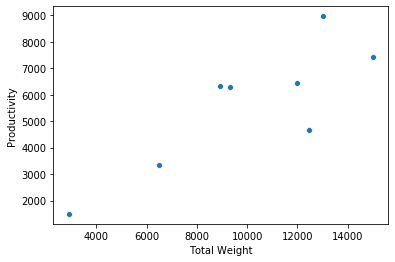

In [47]:
sns.scatterplot(x='Total Weight',y='Productivity',data=df)

In [48]:
df.describe()

,Unnamed: 0,VCN,TAT (ATB -ATUB)\nHOUR,TAT\n(ATA - ATD)\nHOUR,Total Weight,QTY IN LAKH MT,Qty in MMT,TEUs ('000),Port Delay (Hrs),Vessel Delay (Hrs),Productivity,DEAD WT
count,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.0,8.00000,8.000000,8.000000,7.000000
mean,1169.375000,194206.125000,30.44125,51.402500,10009.780750,0.100000,0.010000,0.0,20.03750,0.035000,5626.077500,14387.425714
std,295.484076,3828.000203,19.61293,58.850177,3935.716782,0.038173,0.003817,0.0,48.27243,0.098995,2368.037424,11234.503178
min,862.000000,191391.000000,0.00000,0.000000,2900.000000,0.030000,0.003000,0.0,0.00000,0.000000,1495.170000,2767.270000
25%,878.000000,192037.500000,25.27500,26.415000,8307.500000,0.085000,0.008500,0.0,0.00000,0.000000,4334.467500,6773.135000
50%,1137.500000,192363.000000,35.09000,39.135000,10650.040000,0.105000,0.010500,0.0,0.00000,0.000000,6326.755000,10882.000000
75%,1401.500000,194698.250000,45.16250,52.460000,12601.124500,0.122500,0.012250,0.0,8.23500,0.000000,6691.717500,21343.720000
max,1598.000000,200567.000000,48.40000,186.550000,15000.000000,0.150000,0.015000,0.0,138.70000,0.280000,8965.520000,30829.000000


In [49]:
X=df[['Total Weight']]
y=df['Productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [50]:
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
print(lm.intercept_)

2449.8017566815843


In [52]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Total Weight,0.303881


In [53]:
predictions = lm.predict(X_test)

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))#Main
print('r2_score:',r2_score(y_test, predictions))

MAE: 1582.5769451490776
MSE: 3357062.839354087
RMSE: 1832.2289265684262
r2_score: 0.6513149432777809


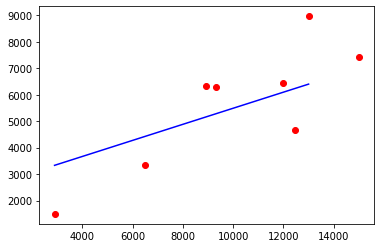

In [55]:
plt.scatter(X,y, color='red')
plt.plot(X_test, predictions,color="blue")

In [56]:
joblib.dump(lm,"Silica_Sand.pkl")#only execute if rmse is less than half of mean of productivity

['Silica_Sand.pkl']